In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import modules.eda as Detective
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Đọc dữ liệu từ project 1 lên và sắp xếp lại dữ liệu

In [3]:
reviews = pd.read_csv("./data/normalize_reviews.csv").fillna("")
reviews = reviews[['raw_comment', 'normalize_comment', 'emoji', 'label']]

reviews.head()

,raw_comment,normalize_comment,emoji,label
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,giao hàng không đúng cần phê bình,,0
1,Chất lượng sản phẩm tạm được. Giao...,chất lượng sản phẩm tạm được giao ...,,0
2,Ko có lắc tay như hình,không có lắc tay như hình,,0
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,giao hàng lâu bảo có lắc tay mà không ...,,0
4,"Mình mua 2 cái, một dùng ok. Một cái k...",mua cái một dùng ok một cái không chạ...,😢,0


Ở phần này, chúng ta sẽ tập trung đi sâu vào mặt khám phá các từ ngữ, bây giờ chúng ta cùng xem bức tranh tổng thể trước. Cụ thể là trong dataset của chúng ta đâu là các từ vựng phổ biến. Chúng ta thực hiền điều này bằng một Python's package là **Wordcloud**:

Tuy nhiên, thư viện trực quan này nó chỉ hoạt động tốt trên tiếng anh vì một số cơ cấu của nó liên quan đến UTF-8, chúng ta sẽ thấy ngay vấn đề sau các bước dưới đây. Và với bản thân tôi cũng không thích cách thư viện này trực quan cho lắm
  ```shell
  pip install wordcloud
  ```

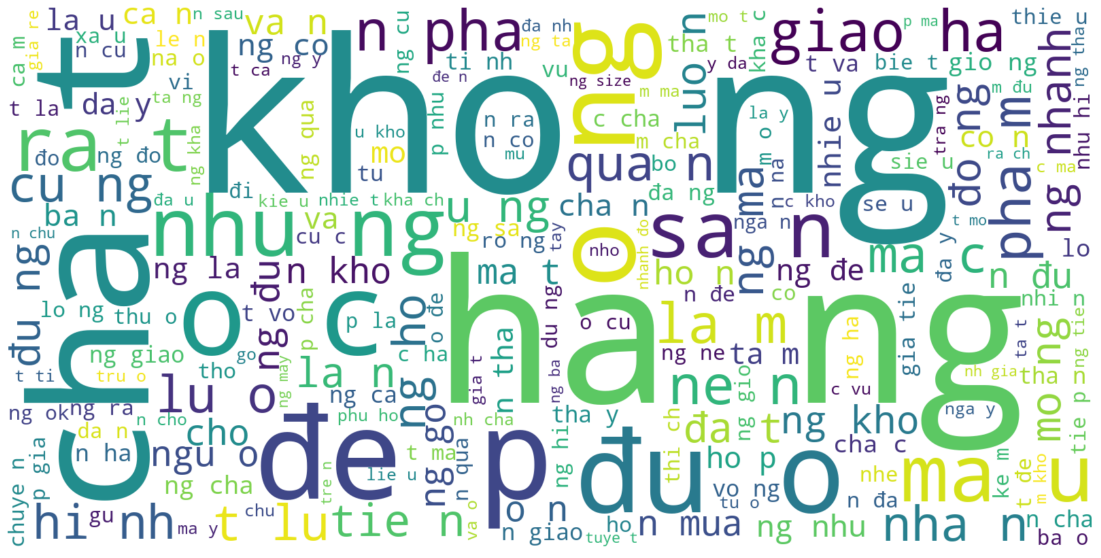

In [4]:
Detective.commentWordCloud(reviews['normalize_comment'])

> **Nhận xét**:
> * Nhìn chung còn khó nhiều dữ liệu noise mặc dù ở bước tiền xử lí ta đã cố gắng loại bỏ chúng nhiều nhất có thể, ta hãy cùng xem nếu trên từng `label` thì có rõ ràng hơn không.

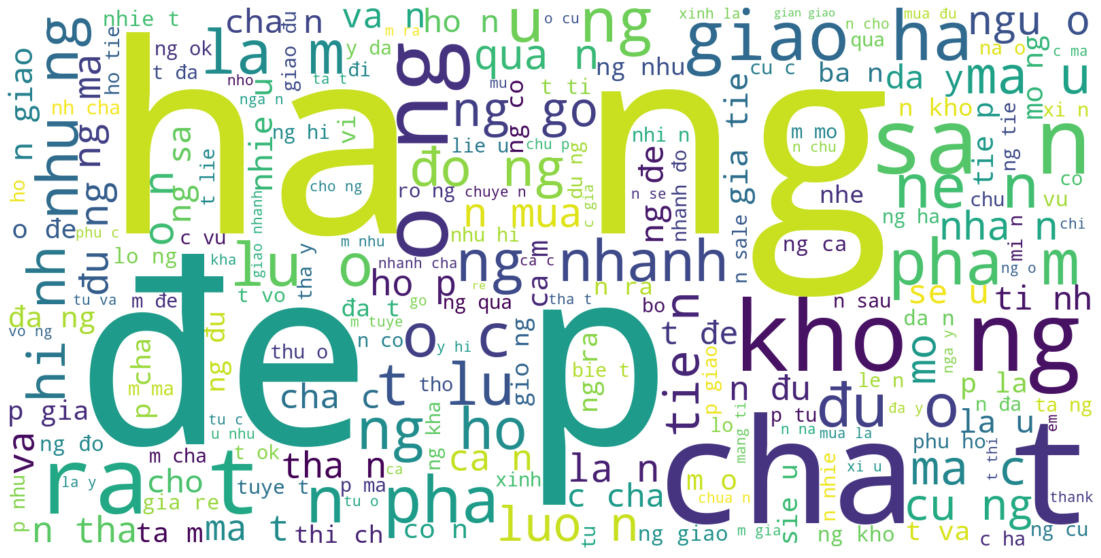

In [5]:
# xem theo label nhóm postive
Detective.commentWordCloud(reviews[reviews['label'] > 0]['normalize_comment'])

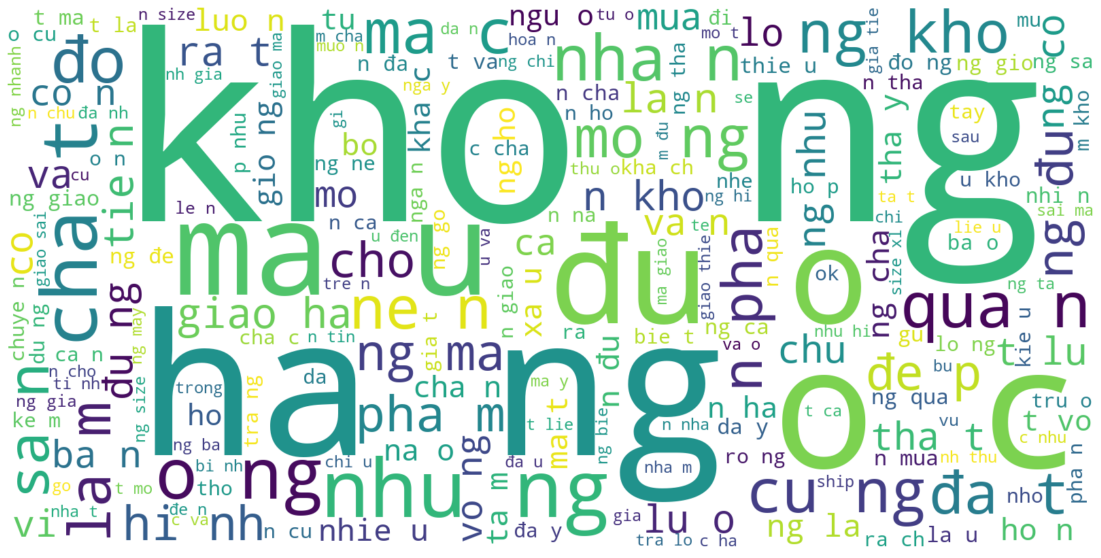

In [6]:
# xem theo label nhóm negative
Detective.commentWordCloud(reviews[reviews['label'] < 1]['normalize_comment'])

> **Nhận xét**:
> * Nhìn chung, đây đa phần là các noise word, nhưng ta vẫn thấy được là từ **kho** mà theo tôi nghĩ đây là từ **không** khi được viết tắt mà ta đã vô tình bỏ qua lúc ta tiền xử lí ở bước chuẩn hóa từ viết tắt.
> * Một điều nữa là đây đa phần là các comment mà không dấu.
> * Nhưng hãy cùng nhìn lại, không thường các noise sample chiếm không nhiều trong dataset, một điều nữa như lúc nói về WordCloud tôi đã nói là thư viện này thực chất nó hoạt động **chỉ thực sự tốt trên tiếng Anh**, với tiếng Việt hay các ngôn ngữ tượng hình khác như tiếng Trung, tiếng Nhật, người ta thường không chuộng sai thư viện này cho lắm.
> * Một điều nữa mà với cá nhân tôi cảm thấy, nó chỉ thực sự tốt khi cho ra bức tranh tổng thể và **HẾT**, nó chỉ đơn giản zoom in từ ra và **XONG**, ta không có được một cái nhìn rõ ràng là từ **A** so với từ **B** nhiều hơn hay ít hơn bao nhiêu lần.

Mặt dù WordCloud cho ta một cái nhìn rất xấu về bức tranh chung của dataset, nhưng để tránh bị đánh lừa, chúng ta hãy thực hiện một vài biện pháp thủ cộng như các bước sau đây.

Một trong những cách để xử lí khi gặp vấn đề này đối với cá nhân tôi là tôi sẽ áp dụng lần lượt các phương pháp là **Bag of words** rồi sau đó là **TF-IDF**, sau đó tôi chia thành các đoạn $[m, n]$ và thống kê frequency xem các từ nào mà nằm trong các đoạn này.

In [7]:
word_freq = Detective.createBagOfWordsFrequency(reviews['normalize_comment'])
word_freq[:20]

[('không', 7310),
 ('hàng', 6249),
 ('giao', 4568),
 ('đẹp', 3987),
 ('chất', 3818),
 ('mua', 3485),
 ('áo', 3181),
 ('nhưng', 2856),
 ('được', 2799),
 ('rất', 2454),
 ('giá', 2451),
 ('mà', 2382),
 ('có', 2357),
 ('nên', 2284),
 ('sản', 2277),
 ('vải', 2270),
 ('phẩm', 2253),
 ('màu', 2182),
 ('nhanh', 2096),
 ('là', 1909)]

> **Nhận xét**:
> * Rõ ràng là WordCloud đã đánh lừa chúng ta, theo WordCloud nó nói rằng từ **kho** là xuất hiện nhiều nhất và nó là một từ không dấu, nhưng khi ta thử liệt kê ra 20 từ có tần số xuất hiện nhiều nhất thì **kho** biến mất và không một từ nào trong 20 từ này mà với cá nhân tôi thì nó là một noise word cả.
> * Vậy nếu như chúng ta quá vội vàng và mất bình tĩnh thì có thể chúng ta đã phí nhiều công sức để làm lại pre-processing lại dataset này.
> * Dù có vẻ nảy giờ tôi chê bai WordCloud rất nhiều nhưng nếu ta có gắng xử lí thì nó vẫn mang lại cho ta một cái nhìn tốt về dữ liệu dạng text, hình dưới đây là công lao cho mọi khám phá và xử lí trong 20 phút quá của tôi. Nhưng như đã đề cập, tôi không muốn tập trung vào biểu đồ này cho lắm và nó không cung cấp cho ta một cái nhìn rõ ràng về dữ liệu và code thì cũng phức tạp nên tôi sẻ chỉ show kết quả ở đây.
> <br><br>
> **Negative class**
> ![](./images/09.png)
> <br><br>
> **Positive class**
> ![](./images/10.png)

In [8]:
tmp = Detective.bagOfWordsGetRangeBased(word_freq, (9999999, 200))
tmp

[('không', 7310),
 ('hàng', 6249),
 ('giao', 4568),
 ('đẹp', 3987),
 ('chất', 3818),
 ('mua', 3485),
 ('áo', 3181),
 ('nhưng', 2856),
 ('được', 2799),
 ('rất', 2454),
 ('giá', 2451),
 ('mà', 2382),
 ('có', 2357),
 ('nên', 2284),
 ('sản', 2277),
 ('vải', 2270),
 ('phẩm', 2253),
 ('màu', 2182),
 ('nhanh', 2096),
 ('là', 1909),
 ('hơi', 1849),
 ('ok', 1838),
 ('quần', 1824),
 ('như', 1794),
 ('lượng', 1782),
 ('mặc', 1772),
 ('hình', 1704),
 ('lắm', 1685),
 ('size', 1680),
 ('quá', 1649),
 ('cho', 1545),
 ('cũng', 1432),
 ('tiền', 1406),
 ('cái', 1391),
 ('luôn', 1279),
 ('lần', 1269),
 ('mỏng', 1241),
 ('nhận', 1211),
 ('gói', 1201),
 ('tốt', 1174),
 ('đặt', 1148),
 ('sẽ', 1121),
 ('chỉ', 1098),
 ('đóng', 1085),
 ('người', 1072),
 ('đúng', 1010),
 ('khá', 947),
 ('hơn', 925),
 ('mọi', 897),
 ('nhiều', 869),
 ('hộ', 866),
 ('rẻ', 851),
 ('còn', 847),
 ('của', 824),
 ('ủng', 823),
 ('vừa', 808),
 ('giống', 774),
 ('ản